0.595

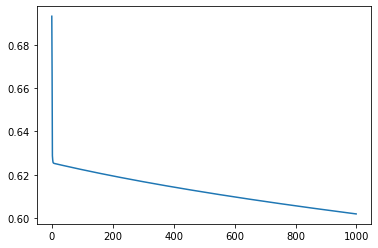

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

np.random.seed(0)
n_samples = 1000

age = np.random.randint(1, 91, size=n_samples)
gender = np.random.randint(0, 2, size=n_samples)
pclass = np.random.randint(1, 4, size=n_samples)

survival_chance = (gender * 0.8 + pclass * 0.1) / 2
survived = np.random.binomial(1, survival_chance)

survived

data = pd.DataFrame({'X0': np.ones(n_samples), 'Age': age, 'Gender': gender, 'Pclass': pclass, 'Survived': survived})

X = data[['X0', 'Age', 'Gender', 'Pclass']].values 
y = data['Survived'].values.reshape(-1, 1) 

X_train, X_test = X[:int(0.8 * n_samples)], X[int(0.8 * n_samples):]
y_train, y_test = y[:int(0.8 * n_samples)], y[int(0.8 * n_samples):]

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))
def cost(X, Y, theta):
    y_p = hypothesis(X, theta)
    loss = -1 * (np.mean(Y * np.log(y_p) + (1 - Y) * np.log(1 - y_p)))
    return loss
def gradient(X, Y, theta):
    y_p = hypothesis(X, theta)
    grad = np.dot(X.T , (Y - y_p))
    return grad / X.shape[0]

def gradient_descent(X, Y, learning_rate=0.3, epochs=100):
    m, n = X.shape
    theta = np.zeros((n, 1))
    cost_epoch = []
    for i in range(epochs):
        print('The algo is on epoch no : ',i, end = '\r')
        loss = cost(X, Y, theta)
        grad = gradient(X, Y, theta)
        cost_epoch.append(loss)
        theta = theta + learning_rate * grad
    return theta, cost_epoch

theta, cost_history = gradient_descent(X_train, y_train, learning_rate=0.003, epochs=1000)

theta

plt.plot(cost_history)

def predict(X, theta):
    y_p = hypothesis(X, theta)
    return (y_p >= 0.5).astype(int)

y_pred = predict(X_test, theta)

y_pred

accuracy = np.mean(y_pred == y_test)

accuracy


